In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from matplotlib import colors as mcolors

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
#print(mouse_drug_data.head())
#print(clinical_trial_data.head())
# Combine the data into a single dataset
clinical_trial_complete = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")

# Display the data table for preview
clinical_trial_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_df = clinical_trial_complete[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
# Initializing a series with the mean of "Tumor Volume (mm3)" grouped by "Drug" and "Timepoint"
mean_tumor_volume_series = tumor_volume_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Initializing a DataFrame with mean_tumor_volume_series.to_frame() and reseting the index
mean_tumor_volume_df = mean_tumor_volume_series.to_frame().reset_index()
# Changing the name of "Tumor Volume (mm3)" to "Mean Tumor Volume (mm3)"
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"})
# Preview DataFrame
mean_tumor_volume_df.head(10)

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_groupby_series = tumor_volume_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_sem_groupby_df = tumor_sem_groupby_series.to_frame().reset_index()
# Preview DataFrame
tumor_sem_groupby_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Pivoting the tumor_sem_groupby_df so that calling the Standard Error for each drug as the yerr in the plot below is 
# easier
tumor_sem_groupby_pivot = tumor_sem_groupby_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_pivot = mean_tumor_volume_df.pivot(index="Timepoint",
                                                     columns="Drug",
                                                     values="Mean Tumor Volume (mm3)")
# Preview that Reformatting worked
mean_tumor_volume_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


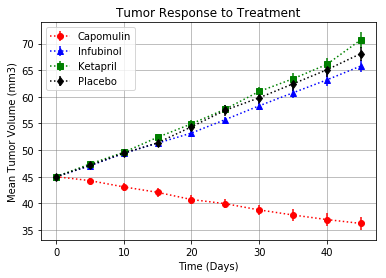

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, len(mean_tumor_volume_df), 10)

fig, ax = plt.subplots()

ax.errorbar(x_axis, mean_tumor_volume_pivot["Capomulin"], yerr=tumor_sem_groupby_pivot["Capomulin"], 
            color="red", linestyle=":", fmt="o")
ax.errorbar(x_axis, mean_tumor_volume_pivot["Infubinol"], yerr=tumor_sem_groupby_pivot["Infubinol"],
            color="blue", linestyle=":", fmt="^")
ax.errorbar(x_axis, mean_tumor_volume_pivot["Ketapril"], yerr=tumor_sem_groupby_pivot["Ketapril"],
            color="green", linestyle=":", fmt="s")
ax.errorbar(x_axis, mean_tumor_volume_pivot["Placebo"], yerr=tumor_sem_groupby_pivot["Placebo"],
            color="black", linestyle=":", fmt="d")

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mean Tumor Volume (mm3)")
ax.set_xticklabels(np.arange(-10, 50, 10))
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)
ax.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], fancybox=True)
# Save the Figure
plt.show()


In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_df = clinical_trial_complete[["Drug", "Timepoint", "Metastatic Sites"]]
mean_met_site_series = met_site_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
mean_met_site_df = mean_met_site_series.to_frame()
# Preview DataFrame
mean_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem_series = met_site_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_site_sem_df = met_site_sem_series.to_frame()
# Preview DataFrame
met_site_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Pivoting the met_site_sem_df so that calling the Standard Error for each drug as the yerr in the plot below is 
# easier
met_site_sem_pivot = met_site_sem_df.reset_index().pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_pivot = mean_met_site_df.reset_index().pivot(index="Timepoint",
                                                           columns="Drug",
                                                           values="Metastatic Sites")
# Preview that Reformatting worked
mean_met_site_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


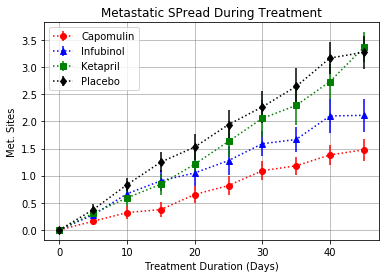

In [12]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(x_axis, mean_met_site_pivot["Capomulin"], yerr=met_site_sem_pivot["Capomulin"],
            color="red", linestyle=":", fmt="o")
ax.errorbar(x_axis, mean_met_site_pivot["Infubinol"], yerr=met_site_sem_pivot["Infubinol"],
            color="blue", linestyle=":", fmt="^")
ax.errorbar(x_axis, mean_met_site_pivot["Ketapril"], yerr=met_site_sem_pivot["Ketapril"],
            color="green", linestyle=":", fmt="s")
ax.errorbar(x_axis, mean_met_site_pivot["Placebo"], yerr=met_site_sem_pivot["Placebo"],
            color="black", linestyle=":", fmt="d")

ax.set_title("Metastatic SPread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_xticklabels(np.arange(-10, 50, 10))
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)
ax.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], fancybox=True)
# Save the Figure

# Show the Figure


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_data_df = clinical_trial_complete[["Drug", "Timepoint", "Mouse ID"]]
mouse_data_grouped_series = mouse_data_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
mouse_data_grouped_df = mouse_data_grouped_series.to_frame().reset_index()
# Preview DataFrame
mouse_data_grouped_df.head()
print(min(mouse_data_grouped_df["Mouse ID"]), max(mouse_data_grouped_df["Mouse ID"]))

7 26


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_data_pivot = mouse_data_grouped_df.pivot(index="Timepoint",
                                                       columns="Drug",
                                                       values="Mouse ID")
# Preview the Data Frame
mouse_data_pivot.head(10)
#print(mouse_data_pivot.columns)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


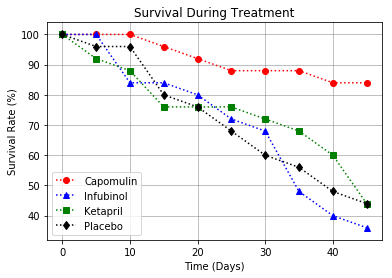

In [15]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

ax.errorbar(x_axis, mouse_data_pivot["Capomulin"], color="red", linestyle=":", fmt="o")
ax.errorbar(x_axis, mouse_data_pivot["Infubinol"], color="blue", linestyle=":", fmt="^")
ax.errorbar(x_axis, mouse_data_pivot["Ketapril"], color="green", linestyle=":", fmt="s")
ax.errorbar(x_axis, mouse_data_pivot["Placebo"], color="black", linestyle=":", fmt="d")

ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_ylim(8,26)
ax.set_yticks(np.arange(10, 26.5, 2.5))
ax.set_yticklabels(np.arange(40, 110, 10))
ax.set_xticklabels(np.arange(-10, 50, 10))
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)
ax.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], fancybox=True)
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
mean_tumor_volume_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [17]:
# Calculate the percent changes for each drug (in Tumor Volume (mm3))
pct_tumor_vol_chng_df = ((mean_tumor_volume_pivot.iloc[9,:] - mean_tumor_volume_pivot.iloc[0,:])
                        /mean_tumor_volume_pivot.iloc[0,:]*100).to_frame()   
pct_tumor_vol_chng_df.columns = [""]
# Display the data to confirm
print(pct_tumor_vol_chng_df)

                    
Drug                
Capomulin -19.475303
Ceftamin   42.516492
Infubinol  46.123472
Ketapril   57.028795
Naftisol   53.923347
Placebo    51.297960
Propriva   47.241175
Ramicane  -22.320900
Stelasyn   52.085134
Zoniferol  46.579751


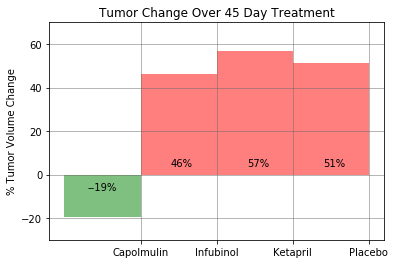

In [18]:
# Store all Relevant Percent Changes into a Tuple
pct_chng_array = pct_tumor_vol_chng_df.iloc[[0,2,3,5]].values
pct_chng_list = pct_chng_array.tolist()
pct_chng_flat_list = []
for sublist in pct_chng_list:
    for item in sublist:
        pct_chng_flat_list.append(item)
x_axis = np.arange(len(pct_chng_flat_list))
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ax.bar(x_axis, pct_chng_flat_list, width=1, color=["g", "red", "red", "red"], alpha=0.5)

# Orient widths. Add labels, tick marks, etc. 
ax.set_yticks(np.arange(-20, 80, 20))
ax.set_ylim(-30, 70)
ax.set_xticks(np.arange(0.5, 4.5 ,1))
ax.set_xticklabels(["Capolmulin", "Infubinol", "Ketapril", "Placebo"])
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid(color="dimgray", alpha=0.8, linewidth=0.6)
# Use functions to label the percentages of changes
ax.text(-0.2, -7, "--19%")
ax.text(0.9, 4, "46%")
ax.text(1.9, 4, "57%")
ax.text(2.9, 4, "51%")

# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()